<a href="https://colab.research.google.com/github/An-Dongsun/Melanoma-Detection/blob/main/EfficientNetV2B1_%EB%AA%A8%EB%8D%B8%EB%A1%9C_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 필요할 라이브러리 불러오기
import tensorflow as tf
import keras
import numpy as np
from keras.preprocessing import image

# 예측
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential, load_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 최종 Model 불러오기
EfficientNet_V2B1_model = load_model('/content/drive/MyDrive/CP1 데이터/EfficientNet_V2B1_model5.h5')

In [14]:
def class_predic():
    img = keras.preprocessing.image.load_img(f"{input()}", target_size=(256,256))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    predictions = EfficientNet_V2B1_model.predict(img_array)
    score = predictions[0]

    class_names = ('benign(흑색종 양성)', 'malignant(흑색종 악성)', 'nevus(모반)', 'BCC(기저 세포 암종)', 'seborrheic_keratosis(지루성 각화증)')

    for i in range(len(class_names)):
        if np.argmax(score) == i:
            print(class_names[i])

In [19]:
class_predic()

/content/drive/MyDrive/CP1 데이터/BCC(기저 세포 암종)/ISIC_0024448.jpg
BCC(기저 세포 암종)


In [20]:
class_predic()

/content/drive/MyDrive/CP1 데이터/benign(흑색종 양성)/melanoma_10077.jpg
benign(흑색종 양성)


In [21]:
class_predic()

/content/drive/MyDrive/CP1 데이터/malignant(흑색종 악성)/melanoma_10223.jpg
malignant(흑색종 악성)


In [22]:
class_predic()

/content/drive/MyDrive/CP1 데이터/nevus(모반)/ISIC_0000322.jpg
nevus(모반)


In [23]:
class_predic()

/content/drive/MyDrive/CP1 데이터/seborrheic_keratosis(지루성 각화증)/ISIC_0013742.jpg
seborrheic_keratosis(지루성 각화증)


# Confusion matrix

In [23]:
# 이미지 파일들 불러오기
Dataset_directory = '/content/drive/MyDrive/CP1 데이터'

train = tf.keras.preprocessing.image_dataset_from_directory(
        Dataset_directory,
        labels = "inferred",
        label_mode = 'categorical', # 레이블이 범주형 벡터로 인코딩됨을 의미
        class_names = {'BCC(기저 세포 암종)', 'benign(흑색종 양성)', 'malignant(흑색종 악성)', 'nevus(모반)', 'seborrheic_keratosis(지루성 각화증)'},
        color_mode = "rgb",
        batch_size = 32,
        image_size = (256, 256),
        shuffle = True,
        seed = 42,
        validation_split = 0.1,
        subset = 'training',
        interpolation = "bilinear",
        follow_links = False,
        crop_to_aspect_ratio = False,
)

test = tf.keras.preprocessing.image_dataset_from_directory(
        Dataset_directory,
        labels = "inferred",
        label_mode = 'categorical',
        class_names = {'BCC(기저 세포 암종)', 'benign(흑색종 양성)', 'malignant(흑색종 악성)', 'nevus(모반)', 'seborrheic_keratosis(지루성 각화증)'},
        color_mode = "rgb",
        batch_size = 32,
        image_size = (256, 256),
        shuffle = True,
        seed = 42,
        validation_split = 0.1,
        subset = 'validation',
        interpolation = "bilinear",
        follow_links = False,
        crop_to_aspect_ratio = False,
)

Found 20053 files belonging to 5 classes.
Using 18048 files for training.
Found 20053 files belonging to 5 classes.
Using 2005 files for validation.


In [24]:
y_true = []
y_pred = []
for x,y in test:
  y= tf.argmax(y,axis=1)
  y_true.append(y)
  y_pred.append(tf.argmax(EfficientNet_V2B1_model.predict(x),axis = 1))
  
y_pred = tf.concat(y_pred, axis=0)
y_true = tf.concat(y_true, axis=0)

In [47]:
y_true

<tf.Tensor: shape=(2005,), dtype=int64, numpy=array([2, 0, 3, ..., 2, 2, 2])>

In [48]:
y_pred

<tf.Tensor: shape=(2005,), dtype=int64, numpy=array([0, 1, 2, ..., 0, 0, 0])>

In [66]:
true_list = ['흑색종 양성', '기저 세포 암종', '흑색종 악성', '모반(점)', '지루성 각화증']
y_true_list = []
for i in y_true:
  y_true_list.append(true_list[i])

pred_list = ['흑색종 악성', '흑색종 양성', '모반(점)', '기저 세포 암종', '지루성 각화증']
y_pred_list = []
for i in y_pred:
  y_pred_list.append(pred_list[i])

In [ ]:
y_true_list

In [ ]:
y_pred_list

In [7]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


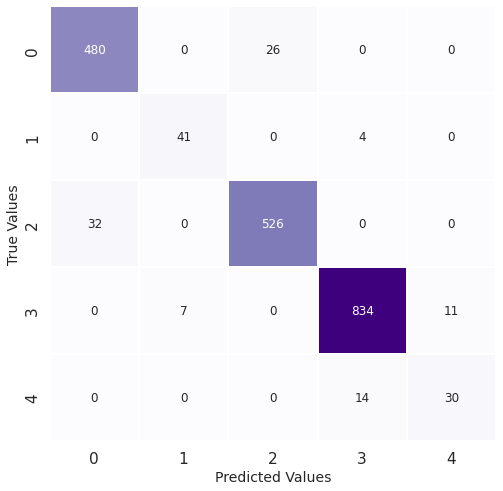

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_true_list, y_pred_list, labels=['흑색종 양성', '기저 세포 암종', '흑색종 악성', '모반(점)', '지루성 각화증'])
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.4) #for label size
sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12}, linewidths=1.0,
     cbar = False, cmap='Purples');
ax1.set_ylabel('True Values',fontsize=14)
ax1.set_xlabel('Predicted Values',fontsize=14)
plt.show()

In [68]:
print(classification_report(y_true_list, y_pred_list))

                  precision    recall  f1-score   support

기저 세포 암종       0.85      0.91      0.88        45
        모반(점)       0.98      0.98      0.98       852
지루성 각화증       0.73      0.68      0.71        44
흑색종 악성       0.95      0.94      0.95       558
흑색종 양성       0.94      0.95      0.94       506

        accuracy                           0.95      2005
       macro avg       0.89      0.89      0.89      2005
    weighted avg       0.95      0.95      0.95      2005



In [79]:
import pandas as pd
report = classification_report(y_true_list, y_pred_list, output_dict=True)
df = pd.DataFrame(report).transpose()

In [81]:
pd.options.display.float_format = '{:,.4f}'.format

In [82]:
df

,precision,recall,f1-score,support
기저 세포 암종,0.8542,0.9111,0.8817,45.0000
모반(점),0.9789,0.9789,0.9789,852.0000
지루성 각화증,0.7317,0.6818,0.7059,44.0000
흑색종 악성,0.9529,0.9427,0.9477,558.0000
흑색종 양성,0.9375,0.9486,0.9430,506.0000
accuracy,0.9531,0.9531,0.9531,0.9531
macro avg,0.8910,0.8926,0.8914,"2,005.0000"
weighted avg,0.9530,0.9531,0.9530,"2,005.0000"
